In [1]:
import pandas as pd #Biblioteca responsavel pela manipulação dos dados
import numpy as np #Biblioteca pra trabalhar com Array e Matriz
import seaborn as sns #Biblioteca de Plot
import matplotlib.pyplot as plt #Tambem uma biblioteca de plot(Trabalha em conjunto com seaborn)

#Vamos vendo com o tempo o que sera usado e descartado, como exemplo vamos deixar esses 3 como principais pra teste de acuracia.
from sklearn.ensemble import RandomForestClassifier #Modelo de Machine Learning - TESTE 1
from sklearn.linear_model import LinearRegression, LogisticRegression #Modelo de Machine Learning - TESTE 2
from sklearn.naive_bayes import MultinomialNB #use to predict

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score #Anda em conjunto com o ML, 3 tipos de métricas para aprendizagem da maquina e testes

#modelo de seleção
from sklearn.model_selection import train_test_split #Modelo de Machine Learning - TESTE 3

from nltk.tokenize import RegexpTokenizer #split words frin text
from nltk.stem.snowball import SnowballStemmer #stemmes words
from sklearn.feature_extraction.text import CountVectorizer #create sparse matrix of words usind regexp

from sklearn.tree import export_graphviz
import graphviz

from collections import Counter

In [2]:
df = pd.read_csv('malicious_phish.csv') #Coletando o primeiro dataset

In [3]:
df.fillna(df.mode().iloc[0], inplace=True) #substituir os campos nulos por zero
print(df.info()) #conteudo do dataset 1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651191 entries, 0 to 651190
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     651191 non-null  object
 1   type    651191 non-null  object
dtypes: object(2)
memory usage: 9.9+ MB
None


In [4]:
df.head(10)

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement
5,http://buzzfil.net/m/show-art/ils-etaient-loin...,benign
6,espn.go.com/nba/player/_/id/3457/brandon-rush,benign
7,yourbittorrent.com/?q=anthony-hamilton-soulife,benign
8,http://www.pashminaonline.com/pure-pashminas,defacement
9,allmusic.com/album/crazy-from-the-heat-r16990,benign


In [5]:
df.isnull().sum() #mostra os valores nulos no dataset 1

url     0
type    0
dtype: int64

In [6]:
df.describe() #Conteudo do dataset 1: 641.191 dados e 4 tipos de classificação

,url,type
count,651191,651191
unique,641119,4
top,http://style.org.hc360.com/css/detail/mysite/s...,benign
freq,180,428103


In [7]:
print(f"Colunas do dataframe DF {df.columns}, \nValores para ML: {df['type'].value_counts()}, \nConteúdo: {df.index}\n" )

Colunas do dataframe DF Index(['url', 'type'], dtype='object'), 
Valores para ML: type
benign        428103
defacement     96457
phishing       94111
malware        32520
Name: count, dtype: int64, 
Conteúdo: RangeIndex(start=0, stop=651191, step=1)



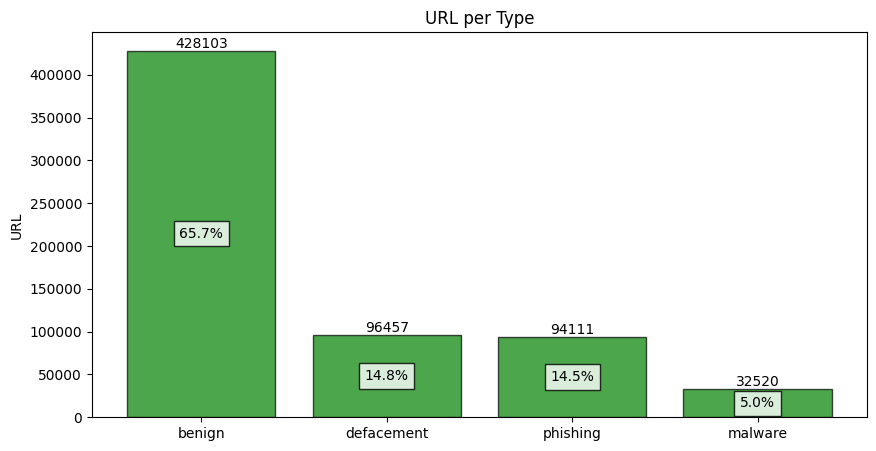

In [22]:
types = df['type'].values

counter_types = Counter(types)

type_names = list(counter_types.keys())
type_values = list(counter_types.values())

sorted_indices = np.argsort(type_values)[::-1]
type_names = [type_names[i] for i in sorted_indices]
type_values = [type_values[i] for i in sorted_indices]

total_count = sum(type_values)
percentages = [value / total_count * 100 for value in type_values]

pattern = ''

y_pos = np.arange(len(type_names))
plt.figure(1, figsize=(10, 5))
bars = plt.bar(y_pos, type_values, align='center', alpha=0.7, color='green', edgecolor='black', hatch=pattern)

for bar, value, percentage in zip(bars, type_values, percentages):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{value}', ha='center', va='bottom')
    plt.text(bar.get_x() + bar.get_width() / 2, height / 2, f'{percentage:.1f}%', ha='center', va='center',
             bbox=dict(facecolor='white', alpha=0.8, edgecolor='black'))

plt.xticks(y_pos, type_names)
plt.ylabel('URL')
plt.title('URL per Type')
plt.show()

In [23]:
tokenizer = RegexpTokenizer(r'[A-Za-z]+')  #O Tokenizer "corta" uma string usando expressões regulares, cada match que corresponde aos tokens ou aos separadores entre os tokens.

In [25]:
print(df.url[2])

tokenizer.tokenize(df.url[2])

bopsecrets.org/rexroth/cr/1.htm


['bopsecrets', 'org', 'rexroth', 'cr', 'htm']

In [26]:
df['text_tokenized'] = df.url.map(lambda t: tokenizer.tokenize(t))

In [27]:
df.sample(5)

,url,type,text_tokenized
506544,inthepresentsea.com/the_actual_site/cocostodur...,benign,"[inthepresentsea, com, the, actual, site, coco..."
32193,spokeo.com/Lewis+Nixon,benign,"[spokeo, com, Lewis, Nixon]"
448742,cbc.ca/news/politics/story/2011/06/01/pol-soud...,benign,"[cbc, ca, news, politics, story, pol, soudas, ..."
43262,bestuff.com/stuff/kat-tun,benign,"[bestuff, com, stuff, kat, tun]"
437704,http://www.fancygaptourism.com/lodging-and-ser...,defacement,"[http, www, fancygaptourism, com, lodging, and..."


In [28]:
stemmer = SnowballStemmer("english")

In [29]:
df['text_stemmed'] = df['text_tokenized'].map(lambda l: [stemmer.stem(word) for word in l])

In [31]:
df.sample(10)

,url,type,text_tokenized,text_stemmed
149871,willowcreekdrama.weebly.com/,benign,"[willowcreekdrama, weebly, com]","[willowcreekdrama, weebli, com]"
99183,uspondhockey.com/page/show/293985-legend-list,benign,"[uspondhockey, com, page, show, legend, list]","[uspondhockey, com, page, show, legend, list]"
90108,http://www.verrijzenisgemeenschap.nl/index.php...,defacement,"[http, www, verrijzenisgemeenschap, nl, index,...","[http, www, verrijzenisgemeenschap, nl, index,..."
336803,news.delta.com/index.php?s=18&item=84,benign,"[news, delta, com, index, php, s, item]","[news, delta, com, index, php, s, item]"
353121,greatschools.org/ohio/lima/1949-Bath-High-School/,benign,"[greatschools, org, ohio, lima, Bath, High, Sc...","[greatschool, org, ohio, lima, bath, high, sch..."
617758,groups.yahoo.com/group/WebtvSigHelp/,phishing,"[groups, yahoo, com, group, WebtvSigHelp]","[group, yahoo, com, group, webtvsighelp]"
433537,k2noyjemrd.bradul.creatory.org,phishing,"[k, noyjemrd, bradul, creatory, org]","[k, noyjemrd, bradul, creatori, org]"
567504,www.paypal-eu.de/login/49239/index.php,benign,"[www, paypal, eu, de, login, index, php]","[www, paypal, eu, de, login, index, php]"
240874,manta.com/c/mtxvw70/miss-lou-oil-well-supply-llc,benign,"[manta, com, c, mtxvw, miss, lou, oil, well, s...","[manta, com, c, mtxvw, miss, lou, oil, well, s..."
215368,xtremedotnettalk.com/showthread.php?t=84804,benign,"[xtremedotnettalk, com, showthread, php, t]","[xtremedotnettalk, com, showthread, php, t]"


In [32]:
df['text_sent'] = df['text_stemmed'].map(lambda l: ' '.join(l))

In [33]:
df.sample(5)

,url,type,text_tokenized,text_stemmed,text_sent
250459,moviefone.com/celebrity/joie-lee/1808921/main,benign,"[moviefone, com, celebrity, joie, lee, main]","[moviefon, com, celebr, joie, lee, main]",moviefon com celebr joie lee main
101361,spacetimestudios.com/showthread.php?25000-Firs...,benign,"[spacetimestudios, com, showthread, php, First...","[spacetimestudio, com, showthread, php, first,...",spacetimestudio com showthread php first look ...
33179,http://www.ccent.com.au/index.php?option=com_m...,defacement,"[http, www, ccent, com, au, index, php, option...","[http, www, ccent, com, au, index, php, option...",http www ccent com au index php option com mai...
596164,'9d345009-a-62cb3a1a-s-sites.googlegroups.com/...,benign,"[d, a, cb, a, a, s, sites, googlegroups, com, ...","[d, a, cb, a, a, s, site, googlegroup, com, si...",d a cb a a s site googlegroup com site stickam...
225329,http://nypost.com/2015/04/21/robert-durst-book...,benign,"[http, nypost, com, robert, durst, booked, a, ...","[http, nypost, com, robert, durst, book, a, pr...",http nypost com robert durst book a profit on ...


In [34]:
CountVectorize = CountVectorizer()

In [35]:
feat = CountVectorize.fit_transform(df.text_sent) #transforma todo o texto que foi stemado e tokenizado

In [36]:
feat[:5].toarray() #convertendo uma matriz sparse para um array para imprimir a variavel feat

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [37]:
trainX, testX, trainY, testY = train_test_split(feat, df.type)

In [38]:
#LOGISTIC REGRESSION
lr = LogisticRegression()

lr.fit(trainX,trainY)

c:\Program Files\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [39]:
lr.score(testX,testY)

0.9514736053268468

[Text(0, 0.5, 'benign'),
 Text(0, 1.5, 'defacement'),
 Text(0, 2.5, 'malware'),
 Text(0, 3.5, 'phishing')]

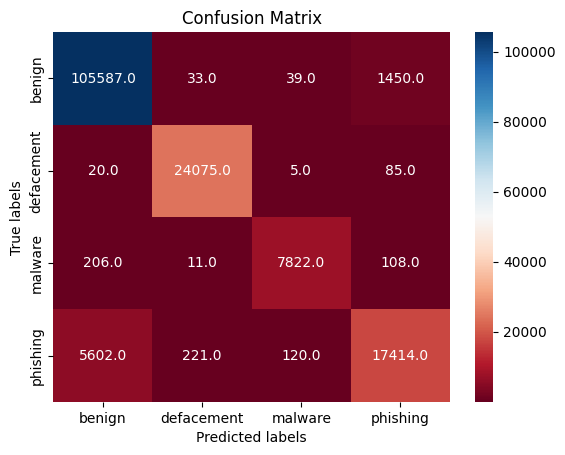

In [41]:
y_pred = lr.predict(testX)
cols = list(lr.classes_)
ax = plt.subplot()
CM_LR = confusion_matrix(testY,y_pred) 
#sns.heatmap(CM_LR, annot=True, fmt='g', ax=ax)  #annot=True to annotate cells, ftm='g' to disable scientific notation
sns.heatmap(CM_LR, annot=True, fmt = ".1f",cmap="RdBu")
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(cols)
ax.yaxis.set_ticklabels(cols)